In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [2]:


# Generate synthetic data with missing values
def create_data():
    X, y = make_classification(
        n_samples=500,
        n_features=10,
        n_informative=5,
        n_redundant=3,
        n_classes=2,
        weights=[0.7, 0.3],
        random_state=42
    )
        # Introduce missing values randomly
    rng = np.random.default_rng(42)
    missing_mask = rng.random(X.shape) < 0.1
    X[missing_mask] = np.nan

    data = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
    data['Target'] = y
    return data

In [3]:
# Visualize missing values
def visualize_missing(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.savefig('MissingValuesheatmap.png')
    plt.show()

In [4]:
# Impute missing values using mean strategy and apply SMOTE
def impute_and_smote(data):
    imputer = SimpleImputer(strategy='mean')
    X = data.drop(columns=['Target'])
    y = data['Target']

    # Impute missing values
    X_imputed = imputer.fit_transform(X)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_imputed, y)

    return pd.DataFrame(X_smote, columns=X.columns), y_smote


In [5]:
# Visualize original and imputed data
def visualize_distributions(original, imputed):
    for col in original.columns:
        plt.figure(figsize=(12, 5))

        # Plot original data
        sns.histplot(original[col].dropna(), kde=True, label="Original", color='blue', stat='density')

        # Plot imputed data
        sns.histplot(imputed[col], kde=True, label="Imputed", color='orange', stat='density')

        plt.title(f"Distribution Comparison for {col}")
        plt.legend()
        plt.savefig(f"{col}_distribution_comparison.png")
        plt.show()

In [6]:
# Visualize class imbalance before and after SMOTE
def visualize_class_distribution(original_y, smote_y):
    plt.figure(figsize=(10, 5))

    # Original class distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=original_y)
    plt.title("Original Class Distribution")

    # SMOTE class distribution
    plt.subplot(1, 2, 2)
    sns.countplot(x=smote_y)
    plt.title("SMOTE Class Distribution")

    plt.tight_layout()
    plt.savefig('SMOTE_class_distribution.png')
    plt.show()

Original Data with Missing Values:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   1.268034  -1.938790  -2.657481   0.450603        NaN   0.750109   
1  -1.659509   1.799067  -0.321888   0.283751   1.472452   0.771765   
2   0.588233  -0.135523   2.659634   0.034027   0.660927  -0.259529   
3   0.930852   2.858530   3.244368  -0.889241   0.702170  -0.660185   
4  -0.752371   2.277090   2.454236  -0.116229   1.958278   1.670844   

   Feature_6  Feature_7  Feature_8  Feature_9  Target  
0  -1.319657  -1.869816   2.045422   0.839415       1  
1   0.104738        NaN   0.454337  -0.575068       0  
2   1.920629        NaN  -0.864698  -3.041237       1  
3   1.067658   0.955301   0.364498  -0.403121       0  
4   0.637865   0.214713  -1.401239  -2.124745       0  


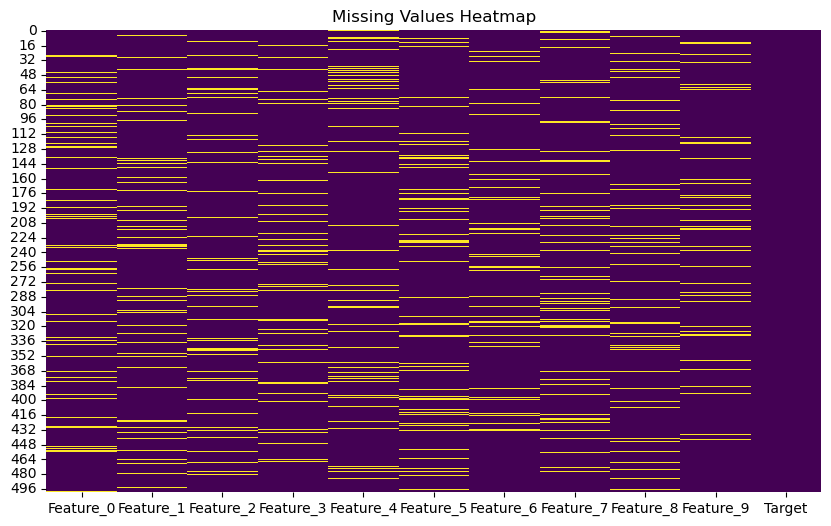

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


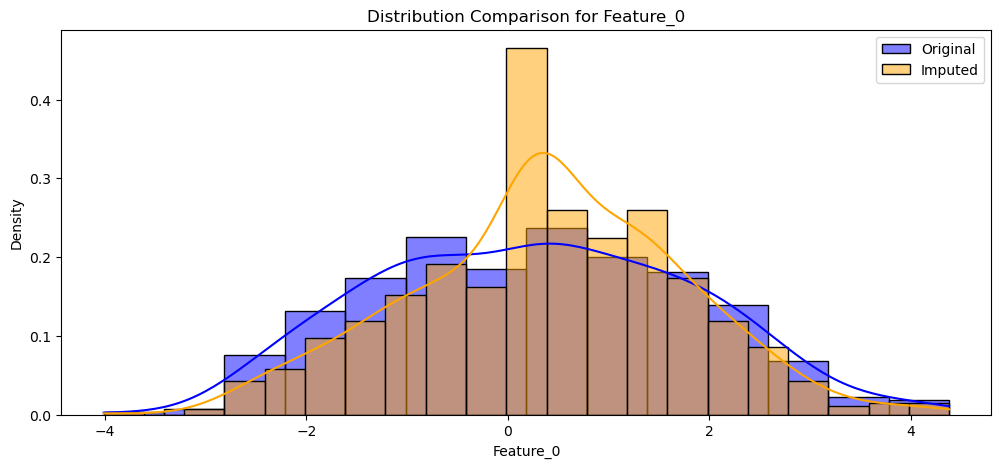

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


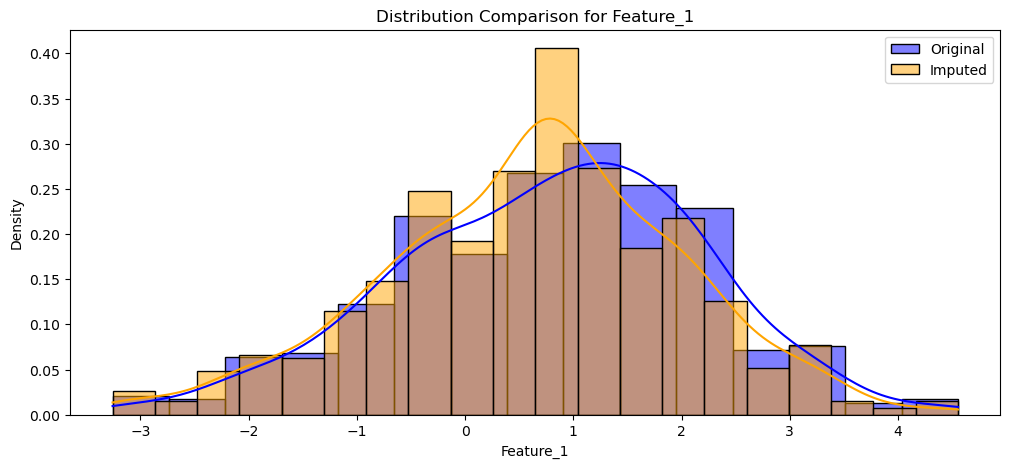

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


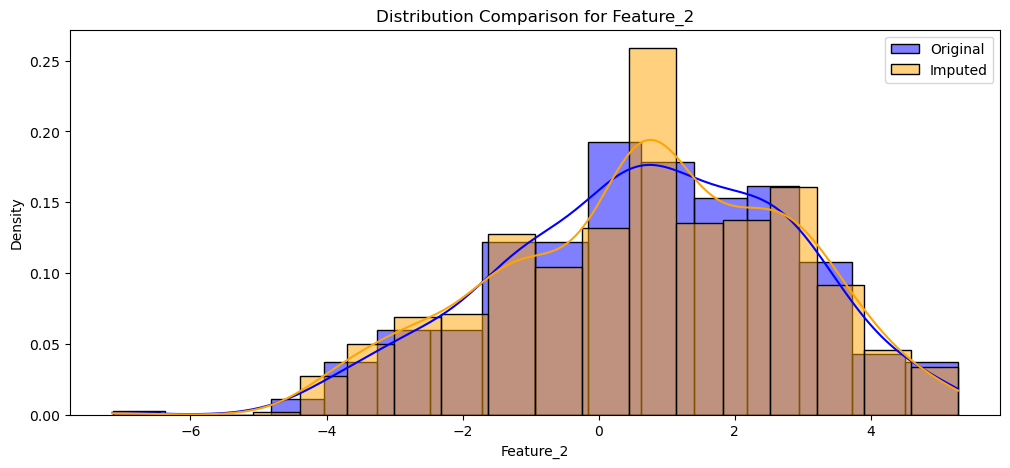

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


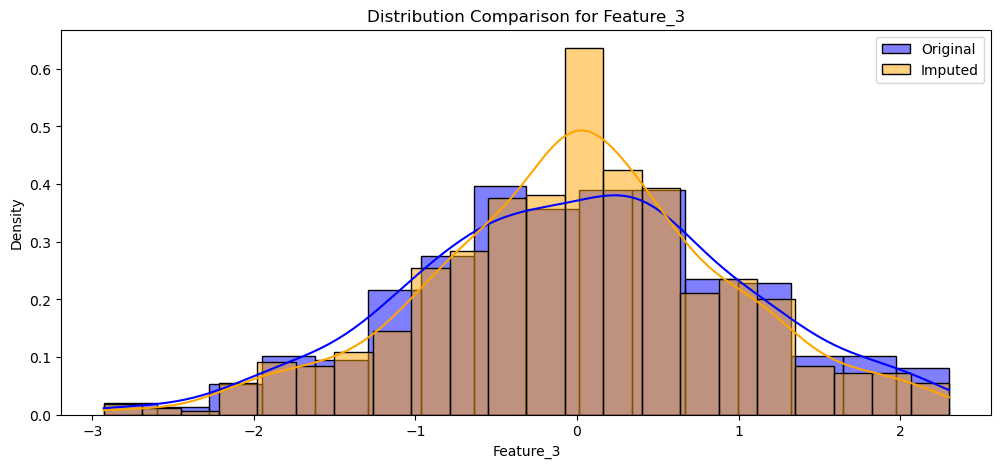

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


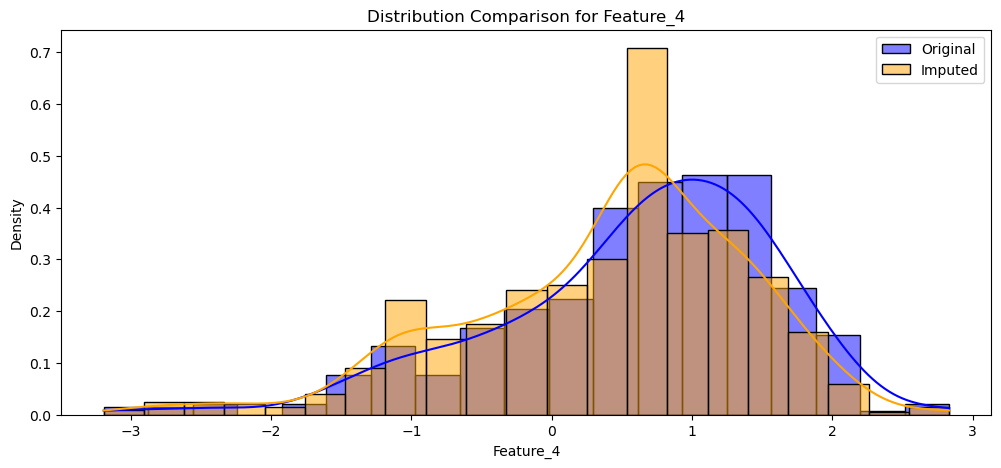

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


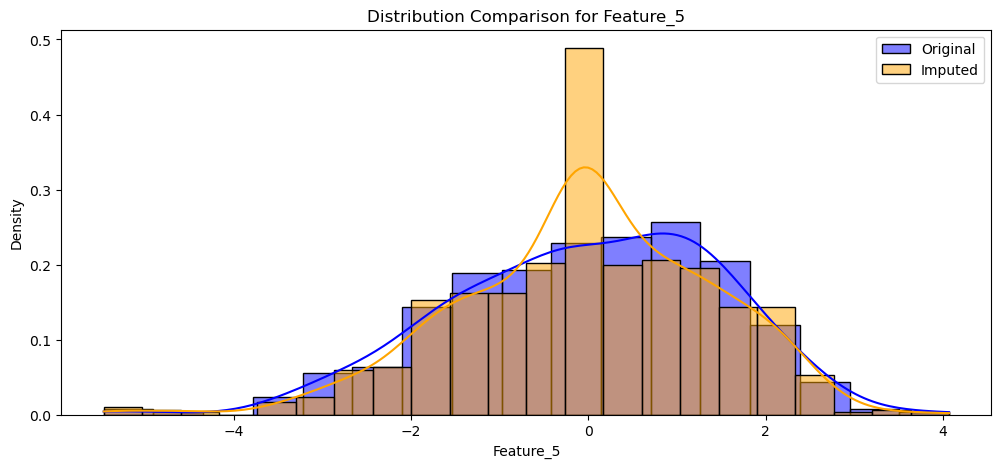

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


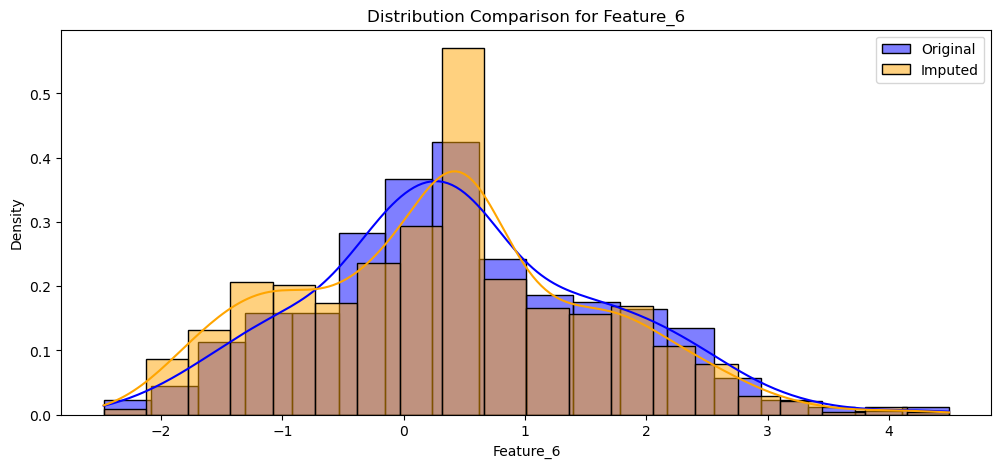

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


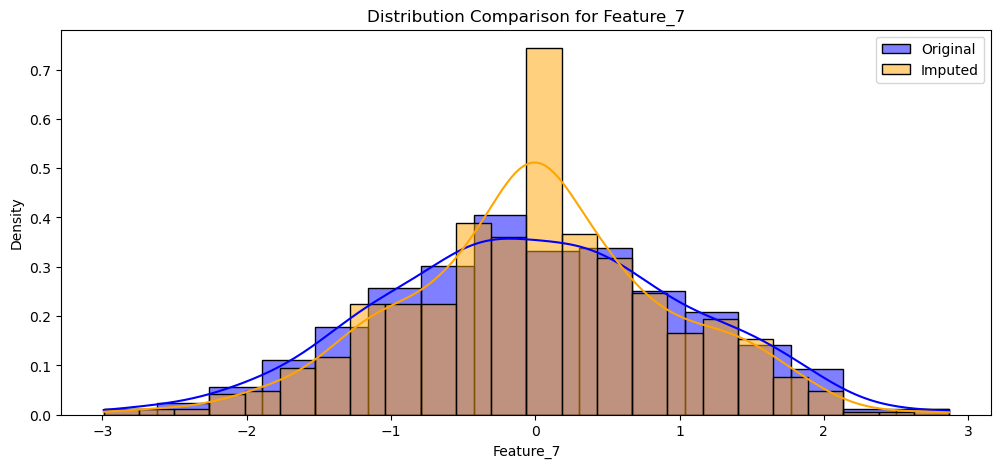

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


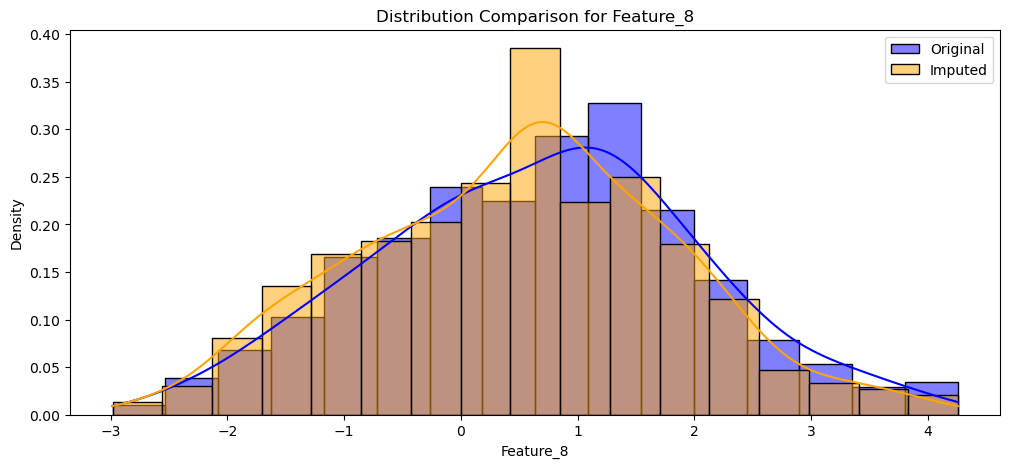

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


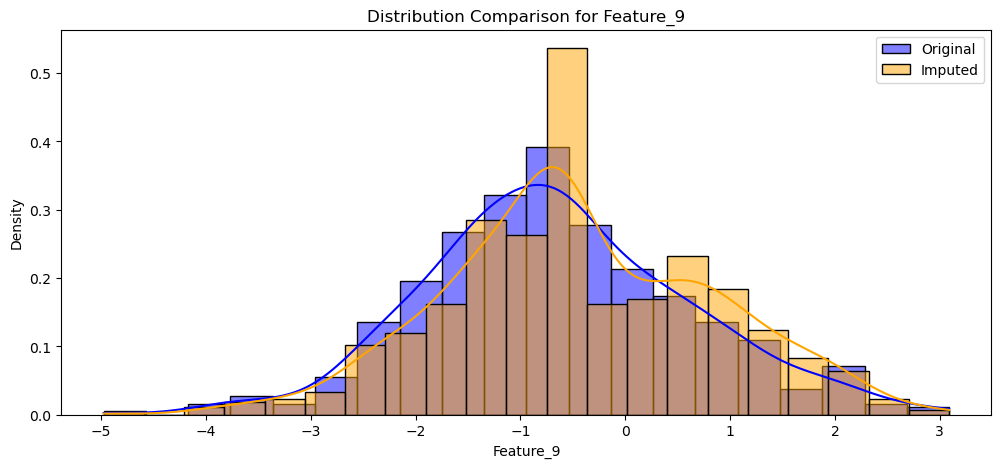

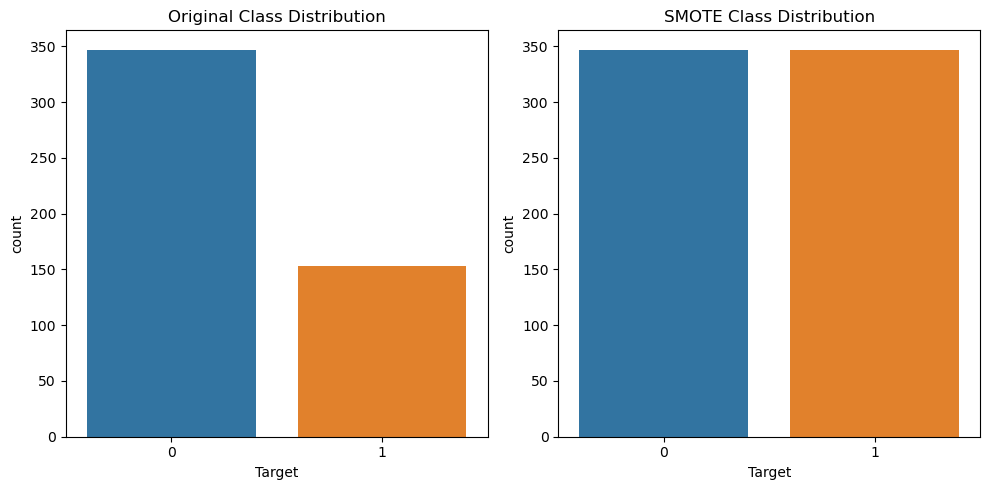

In [7]:

# Main function to execute steps
def main():
    # Step 1: Create data
    data = create_data()
    print("Original Data with Missing Values:")
    print(data.head())

    # Step 2: Visualize missing values
    visualize_missing(data)

    # Step 3: Impute missing values and apply SMOTE
    imputed_data, smote_target = impute_and_smote(data)

    # Step 4: Visualize distributions
    visualize_distributions(data.drop(columns=['Target']), imputed_data)

    # Step 5: Visualize class distribution
    visualize_class_distribution(data['Target'], smote_target)

if __name__ == "__main__":
    main()
